<span style="font-size:60px;">Clustering ISG</span>

<span style="font-size:40px;">Importation des librairies</span>


In [1]:
import pandas as pd
import numpy as np
import json
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.cluster import SpectralClustering

Traces pré traitées

In [2]:
data = pd.read_csv("clean_spy_data.csv")
data.head()

,Unnamed: 0,actor,timestamp,stored,verb,levels,result,time
0,288908,f10c3152,2023-03-17T13:49:01.7960000Z,2023-03-17T13:49:15.073Z,executed,levels/collaborateur/niveau03,NaN,NaN
1,288914,f10c3152,2023-03-17T13:48:57.6240000Z,2023-03-17T13:49:15.073Z,inserted,levels/collaborateur/niveau03,NaN,NaN
2,288930,f10c3152,2023-03-17T13:48:48.9860000Z,2023-03-17T13:49:15.073Z,inserted,levels/collaborateur/niveau03,NaN,NaN
3,288945,f10c3152,2023-03-17T13:48:41.1910000Z,2023-03-17T13:49:15.073Z,inserted,levels/collaborateur/niveau03,NaN,NaN
4,289002,f10c3152,2023-03-17T13:48:10.5390000Z,2023-03-17T13:49:15.073Z,inserted,levels/collaborateur/niveau03,NaN,NaN


Données sur les profils des joueurs

In [3]:
profiles = pd.read_csv("profiles.csv")
profiles.head()

,ID,predicted_class,Class,IsTeacher,Progression,HighScore,LastUpdate
0,103D4EAB,3ème,302,0,"{""0 - Tutoriel"":1,""1 - Explorateur"":9,""2 - Col...","{""Levels\/Tutoriel\/Tutoriel.xml"":3,""Levels\/E...",2023-05-25 09:52:32
1,133323C,5ème,5ÈME,0,"{""0 - Tutoriel"":1,""1 - Explorateur"":9,""2 - Col...","{""Levels\/Tutoriel\/Tutoriel.xml"":3,""Levels\/E...",2023-05-30 09:50:07
2,1410D322,4ème,4EME,0,"{""0 - Tutoriel"":1,""1 - Explorateur"":9,""2 - Col...","{""Levels\/Tutoriel\/Tutoriel.xml"":3,""Levels\/E...",2023-10-06 15:19:12
3,149C46A2,4ème,4EME,0,"{""0 - Tutoriel"":1,""1 - Explorateur"":9,""2 - Col...","{""Levels\/Tutoriel\/Tutoriel.xml"":3,""Levels\/E...",2023-06-15 09:55:08
4,14A766E2,CM2,CM2,0,"{""0 - Tutoriel"":1,""1 - Explorateur"":9,""2 - Col...","{""Levels\/Tutoriel\/Tutoriel.xml"":3,""Levels\/E...",2023-05-25 13:57:30


In [4]:
clean_profiles = profiles[["ID","predicted_class"]]
clean_profiles.head()

,ID,predicted_class
0,103D4EAB,3ème
1,133323C,5ème
2,1410D322,4ème
3,149C46A2,4ème
4,14A766E2,CM2


Données sur la taille du programme exécuté

In [5]:
launched_executed = pd.read_csv("launched_executed.csv")
launched_executed.head()

,_id,version,id,timestamp,stored,actor,verb,object,result,authority,context
0,65a10eca4c323c03df9f5bf3,1.0.1,65dc6c59-cf55-4ae2-928c-c1cc0e05f2da,2024-01-12T10:02:17.3030000Z,2024-01-12T10:04:57.227Z,"{""objectType"":""Agent"",""name"":""7282E61D"",""accou...","{""id"":""https://spy.lip6.fr/xapi/verbs/executed...","{""objectType"":""Activity"",""id"":""https://spy.lip...",NaN,"{""objectType"":""Agent"",""name"":""New Client"",""mbo...",NaN
1,65a10e52456b8e03f1a32d95,1.0.1,a2d029ca-6216-468a-854f-d7e97fff6751,2024-01-12T10:01:43.0250000Z,2024-01-12T10:02:57.419Z,"{""objectType"":""Agent"",""name"":""8A8C88A8"",""accou...","{""id"":""https://spy.lip6.fr/xapi/verbs/executed...","{""objectType"":""Activity"",""id"":""https://spy.lip...",NaN,"{""objectType"":""Agent"",""name"":""New Client"",""mbo...",NaN
2,65a10eca4c323c03df9f5bdb,1.0.1,fecdbe0f-8c5f-4cea-8965-64940294aace,2024-01-12T10:01:29.3980000Z,2024-01-12T10:04:57.227Z,"{""objectType"":""Agent"",""name"":""7282E61D"",""accou...","{""id"":""http://adlnet.gov/expapi/verbs/launched...","{""objectType"":""Activity"",""id"":""https://w3id.or...",NaN,"{""objectType"":""Agent"",""name"":""New Client"",""mbo...",NaN
3,65a10e98456b8e03f1a32dbb,1.0.1,2012ffd5-3b54-416f-bd43-23b13fc80417,2024-01-12T10:01:20.6060000Z,2024-01-12T10:04:07.092Z,"{""objectType"":""Agent"",""name"":""7282E61D"",""accou...","{""id"":""https://spy.lip6.fr/xapi/verbs/executed...","{""objectType"":""Activity"",""id"":""https://spy.lip...",NaN,"{""objectType"":""Agent"",""name"":""New Client"",""mbo...",NaN
4,65a10e98456b8e03f1a32db9,1.0.1,ae565274-6e3d-4a02-b2f7-af68c8607231,2024-01-12T10:01:16.9320000Z,2024-01-12T10:04:07.092Z,"{""objectType"":""Agent"",""name"":""7282E61D"",""accou...","{""id"":""http://adlnet.gov/expapi/verbs/launched...","{""objectType"":""Activity"",""id"":""https://w3id.or...",NaN,"{""objectType"":""Agent"",""name"":""New Client"",""mbo...",NaN


In [6]:
clean_launched_executed = pd.DataFrame()

clean_id = []
clean_level = []
clean_program = []

for i in range(len(launched_executed)):

    actione = json.loads(launched_executed["verb"][i])
    

    if(actione["id"]=='https://spy.lip6.fr/xapi/verbs/executed'):
        playeride = json.loads(launched_executed["actor"][i])["name"]
        program = json.loads(launched_executed["object"][i])["definition"]["extensions"]["https://spy&46;lip6&46;fr/xapi/extensions/content"][0]

        for j in range(i,len(launched_executed)):

            actionl = json.loads(launched_executed["verb"][j])
            playeridl = json.loads(launched_executed["actor"][j])["name"]


            if((actione != actionl) & (playeride == playeridl) ):

                

                clean_id.append(playeridl)
                clean_level.append(json.loads(launched_executed["object"][j])["definition"]["extensions"]["https://spy&46;lip6&46;fr/xapi/extensions/value"][0])
                clean_program.append(program)
                break



In [7]:
clean_launched_executed["id"] = clean_id
clean_launched_executed["level"] = clean_level
clean_launched_executed["program"] = clean_program
clean_launched_executed["program"][3]

'karl { repeat (2) { repeat (5) { forward; } turnright; } }\n'

In [8]:
clean_count = []

for i in range(len(clean_program)):

    text = clean_program[i]
    count = 0
    valid = 0

    for i in range(len(text)):

        if(text[i]=='{'):
            valid+=1
        elif(text[i]=='}'):
            valid-=1
        elif(valid>0):
            if(('a' <= text[i] <= 'z')  & (text[i-1]==" ")):
                count+=1
    clean_count.append(count)



In [9]:
clean_launched_executed["len_program"] = clean_count
clean_launched_executed = clean_launched_executed[clean_launched_executed["len_program"]!=0]

Dataframe utilisé pour l'analyse sur la longueur du programme utilisé par joueur et par niveau

In [10]:
len_program_df =  clean_launched_executed.groupby(['id', 'level'])['len_program'].sum().reset_index()
len_program_df

,id,level,len_program
0,103D4EAB,levels/collaborateur/niveau01.xml,6
1,103D4EAB,levels/collaborateur/niveau02.xml,25
2,103D4EAB,levels/explorateur/niveau01.xml,1
3,103D4EAB,levels/explorateur/niveau02.xml,2
4,103D4EAB,levels/explorateur/niveau03.xml,3
...,...,...,...
18190,f10c3090,levels/collaborateur/niveau06.xml,90
18191,f10c3090,levels/collaborateur/niveau07.xml,47
18192,f10c3090,levels/tutoriel/createscript.xml,3
18193,f10c3152,levels/collaborateur/niveau02.xml,14


Dataframe utilisé pour l'analyse sur le nombre d'exécutions du programme utilisé par joueur et par niveau

In [11]:
executed_counts = data[data['verb'] == 'executed'].groupby('actor').size()
executed_counts

actor
103D4EAB    23
105CCD82     7
109206A2     4
119113B2    89
12CF4D52    53
            ..
FFD5A34E    17
MATHIEU      9
c0f8ecf1    13
f10c3090     9
f10c3152    12
Length: 732, dtype: int64

In [12]:
# Count unique levels played per actor
levels_played_counts = data.groupby('actor')['levels'].nunique()

# Merge these two series into a DataFrame
execution_df = pd.DataFrame({
    'LevelsPlayed': levels_played_counts,
    'Executions': executed_counts
}).dropna()

In [13]:
executed_score = data[data['verb'] == 'executed'].groupby(['actor','levels']).size()
executed_score = executed_score.reset_index(name='count')
executed_score

,actor,levels,count
0,103D4EAB,levels/collaborateur/niveau01,1
1,103D4EAB,levels/collaborateur/niveau02,3
2,103D4EAB,levels/explorateur/niveau01,1
3,103D4EAB,levels/explorateur/niveau02,1
4,103D4EAB,levels/explorateur/niveau03,1
...,...,...,...
11845,f10c3090,levels/collaborateur/niveau06,3
11846,f10c3090,levels/collaborateur/niveau07,2
11847,f10c3090,levels/tutoriel/createscript,1
11848,f10c3152,levels/collaborateur/niveau02,5


Dataframe utilisé pour les analyses sur le temps 

In [14]:
launched_completed = data[(data["verb"]=="launched") |(data["verb"]=="completed")].reset_index()
launched_completed

,index,Unnamed: 0,actor,timestamp,stored,verb,levels,result,time
0,42,290069,f10c3152,2023-03-17T13:36:13.6560000Z,2023-03-17T13:49:15.073Z,launched,levels/collaborateur/niveau03,NaN,NaN
1,44,290080,f10c3152,2023-03-17T13:36:08.4130000Z,2023-03-17T13:49:15.073Z,completed,levels/collaborateur/niveau02,True,492.058
2,77,290586,f10c3152,2023-03-17T13:27:56.3550000Z,2023-03-17T13:36:10.267Z,launched,levels/collaborateur/niveau02,NaN,NaN
3,93,289244,f10c3090,2023-03-17T13:45:08.7270000Z,2023-03-17T13:48:18.969Z,launched,levels/tutoriel/createscript,NaN,NaN
4,95,289247,f10c3090,2023-03-17T13:45:06.6950000Z,2023-03-17T13:48:18.969Z,completed,levels/collaborateur/niveau07,True,362.299
...,...,...,...,...,...,...,...,...,...
42571,327381,201336,103D4EAB,2023-05-25T07:27:56.9460000Z,2023-05-25T07:24:38.490Z,launched,levels/explorateur/niveau02,NaN,NaN
42572,327383,201372,103D4EAB,2023-05-25T07:27:45.0580000Z,2023-05-25T07:24:12.421Z,completed,levels/explorateur/niveau01,True,29.895
42573,327388,201471,103D4EAB,2023-05-25T07:27:15.1630000Z,2023-05-25T07:24:12.394Z,launched,levels/explorateur/niveau01,NaN,NaN
42574,327390,201526,103D4EAB,2023-05-25T07:27:03.7550000Z,2023-05-25T07:23:31.167Z,completed,levels/tutoriel/tutoriel,True,84.453


In [15]:
clean_launched_completed = pd.DataFrame()

clean_id = []
clean_level = []
clean_time= []

for i in range(len(launched_completed)):

    
    

    if(launched_completed["verb"][i] == "completed"):
        playeridc = launched_completed["actor"][i]
        timec = launched_completed["timestamp"][i]

        for j in range(i,len(launched_completed)):

            playeridl = launched_completed["actor"][j]
            timel = launched_completed["timestamp"][j]

            if((launched_completed["verb"][j] == "launched") & (playeridc == playeridl) ):

                

                clean_id.append(playeridl)
                clean_level.append(launched_completed["levels"][j])
                clean_time.append(launched_completed["time"][i])
                break




clean_launched_completed["id"] = clean_id
clean_launched_completed["level"] = clean_level
clean_launched_completed["time"] = clean_time
clean_launched_completed

,id,level,time
0,f10c3152,levels/collaborateur/niveau02,492.058
1,f10c3090,levels/collaborateur/niveau07,362.299
2,f10c3090,levels/collaborateur/niveau07,195.543
3,f10c3090,levels/collaborateur/niveau06,132.224
4,f10c3090,levels/collaborateur/niveau06,56.500
...,...,...,...
18925,103D4EAB,levels/explorateur/niveau04,42.725
18926,103D4EAB,levels/explorateur/niveau03,27.930
18927,103D4EAB,levels/explorateur/niveau02,14.216
18928,103D4EAB,levels/explorateur/niveau01,29.895


<span style="font-size:40px;">Présentation des données</span>


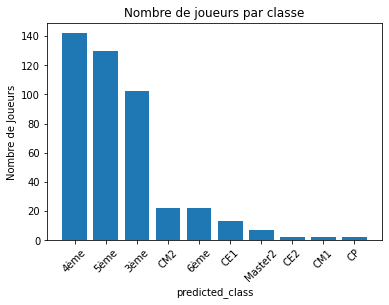

In [16]:
plt.figure()
class_count = profiles['predicted_class'].value_counts()

plt.bar(class_count.index, class_count.values)
plt.title('Nombre de joueurs par classe')
plt.xlabel('predicted_class')
plt.ylabel('Nombre de Joueurs')
plt.xticks(rotation=45)  
plt.show()

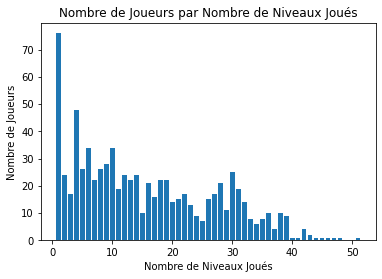

In [17]:
levels_played_counts = data.groupby('actor')['levels'].nunique()

players_per_level_count = levels_played_counts.value_counts().sort_index()

plt.bar(players_per_level_count.index, players_per_level_count.values)
plt.title('Nombre de Joueurs par Nombre de Niveaux Joués')
plt.xlabel('Nombre de Niveaux Joués')
plt.ylabel('Nombre de Joueurs')
plt.show()

<span style="font-size:40px;">Clustering 2D</span>


Partie exécution

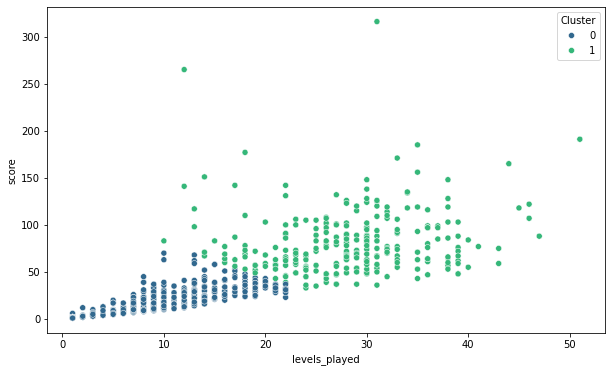

In [18]:
plot_data_executed = pd.DataFrame({

    'levels_played' : executed_score.groupby('actor')["levels"].count(),
    'score' : executed_score.groupby('actor')["count"].sum()

}).dropna()

# Normalisation des caractéristiques
scaler = StandardScaler()
scaled_features = scaler.fit_transform(plot_data_executed)
silhouette_scores = []
for i in range(2, 11):  # Commence à 2 car il n'y a pas de score de silhouette pour un seul cluster
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_scores.append(score)

# Trouver le nombre optimal de clusters basé sur le score de silhouette le plus élevé
optimal_n_clusters = np.argmax(silhouette_scores) + 2  # +2 car l'index commence à 0 et la boucle à 2 clusters

# Appliquer KMeans avec le nombre optimal de clusters
kmeans_optimal = KMeans(n_clusters=optimal_n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans_optimal.fit(scaled_features)

# Ajouter les étiquettes de cluster aux données
plot_data_executed['Cluster'] = kmeans_optimal.labels_

# Visualisation des clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=plot_data_executed, x='levels_played', y='score', hue='Cluster', palette='viridis')
plt.show()

c:\Users\Lorenzo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


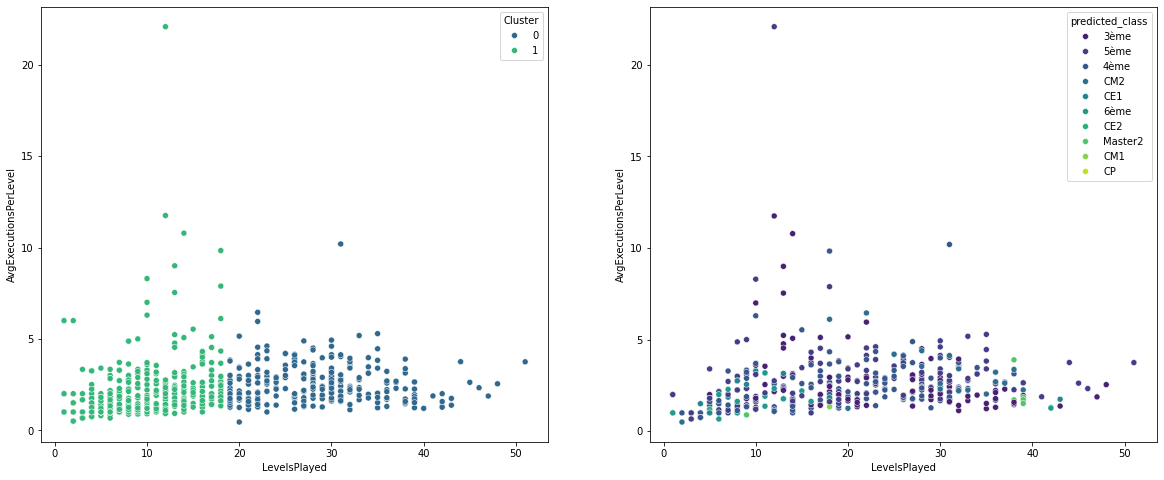

In [19]:
total_executions_per_actor = executed_score.groupby('actor')['count'].sum()

# Calculate the average number of executions per level for each actor
average_executions_per_level = total_executions_per_actor / levels_played_counts

# Updating the DataFrame for clustering
execution_df['AvgExecutionsPerLevel'] = average_executions_per_level.dropna()

# Apply clustering with the new metric
kmeans = KMeans(n_clusters=2)
execution_df['Cluster'] = kmeans.fit_predict(execution_df[['LevelsPlayed', 'AvgExecutionsPerLevel']])
execution_df_class = pd.merge(execution_df, clean_profiles, left_on='actor', right_on='ID', how='right')
# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
sns.scatterplot(data=execution_df, x='LevelsPlayed', y='AvgExecutionsPerLevel', hue='Cluster', palette='viridis', ax = ax1)
sns.scatterplot(data=execution_df_class, x='LevelsPlayed', y='AvgExecutionsPerLevel', hue='predicted_class', palette='viridis',ax = ax2)

plt.show()

In [20]:
clean_mean_execution = executed_score.groupby("levels")["count"].mean()
clean_mean_execution

levels
levels/blocklymaze/niveau01     1.218182
levels/blocklymaze/niveau02     1.465116
levels/blocklymaze/niveau03     1.350000
levels/blocklymaze/niveau04     2.554622
levels/blocklymaze/niveau05     1.655172
                                  ...   
levels/tutoriel/createscript    1.356522
levels/tutoriel/nommerscript    2.838269
levels/tutoriel/ouvrirporte     2.091476
levels/tutoriel/tutoriel        1.195122
testfromleveled                 2.000000
Name: count, Length: 69, dtype: float64

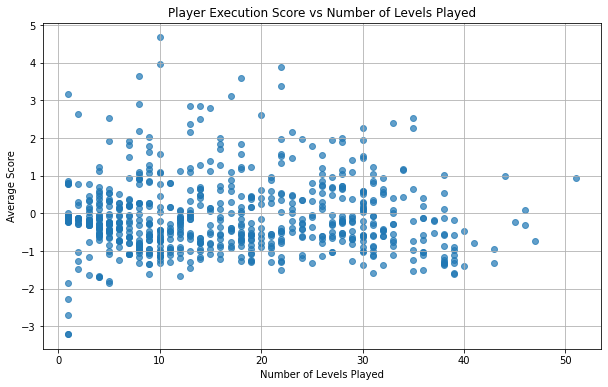

In [39]:
# Step 1: Calculating the difference between completion time and mean completion time for each level for each player

# Joining the mean completion time data with the original data

new_executed_score = executed_score.merge(clean_mean_execution, on='levels', suffixes=('', '_mean'))



# Calculating the absolute difference between the player's completion time and the mean completion time
new_executed_score["difference"] = 0
new_executed_score['difference'] = (new_executed_score['count'] - new_executed_score['count_mean'])



# Step 2: Calculating the mean score (average of the time differences) for each player

player_scores = new_executed_score.groupby('actor')['difference'].mean(numeric_only=False)



# Step 3: Preparing data for the plot

# Counting the number of levels played by each player

levels_played_per_player = new_executed_score.groupby('actor')['levels'].nunique()



# Merging the count of levels played with the scores for each player

plot_data_execution = pd.DataFrame({

    'levels_played': levels_played_per_player,

    'average_score': player_scores

})


plot_data_execution = plot_data_execution[plot_data_execution['average_score'] <5]
# Step 4: Creating the plot

plt.figure(figsize=(10,6))

plt.scatter(plot_data_execution['levels_played'], plot_data_execution['average_score'], alpha=0.7)

plt.title('Player Execution Score vs Number of Levels Played')

plt.xlabel('Number of Levels Played')

plt.ylabel('Average Score')

plt.grid(True)

plt.show()

[0.4099051191787875, 0.44328431163970194, 0.3782346387360553, 0.38272023039175274, 0.3704013705743346, 0.37720404770237326, 0.38302537268791254, 0.3892848417637506, 0.3902586083099294]


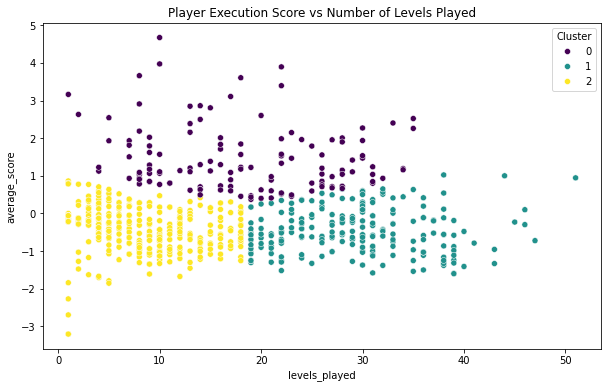

In [40]:
# Normalisation des caractéristiques
scaler = StandardScaler()
scaled_features = scaler.fit_transform(plot_data_execution)
silhouette_scores = []
for i in range(2, 11):  # Commence à 2 car il n'y a pas de score de silhouette pour un seul cluster
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_scores.append(score)

# Trouver le nombre optimal de clusters basé sur le score de silhouette le plus élevé
optimal_n_clusters = np.argmax(silhouette_scores) + 2  # +2 car l'index commence à 0 et la boucle à 2 clusters
print(silhouette_scores)
# Appliquer KMeans avec le nombre optimal de clusters
kmeans_optimal = KMeans(n_clusters=optimal_n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans_optimal.fit(scaled_features)

# Ajouter les étiquettes de cluster aux données
plot_data_execution['Cluster'] = kmeans_optimal.labels_

# Visualisation des clusters
plt.figure(figsize=(10, 6))
plt.title('Player Execution Score vs Number of Levels Played')
sns.scatterplot(data=plot_data_execution, x='levels_played', y='average_score', hue='Cluster', palette='viridis')
plt.show()

In [25]:
clean_mean_program = len_program_df.groupby("level")["len_program"].mean()
clean_mean_program

level
levels/blocklymaze/niveau01.xml      2.611111
levels/blocklymaze/niveau02.xml      6.685185
levels/blocklymaze/niveau03.xml      2.612245
levels/blocklymaze/niveau04.xml     12.151429
levels/blocklymaze/niveau05.xml      7.289474
                                      ...    
levels/tutoriel/createscript.xml     4.170520
levels/tutoriel/nommerscript.xml    11.201504
levels/tutoriel/ouvrirporte.xml     12.092640
levels/tutoriel/tutoriel.xml         1.239274
testfromleveleditor                 75.500000
Name: len_program, Length: 69, dtype: float64

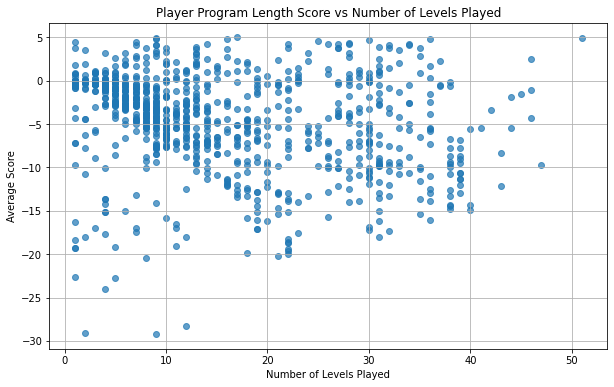

In [41]:
# Step 1: Calculating the difference between completion time and mean completion time for each level for each player

# Joining the mean completion time data with the original data

new_len_program_df = len_program_df.merge(clean_mean_program, on='level', suffixes=('', '_mean'))



# Calculating the absolute difference between the player's completion time and the mean completion time
new_len_program_df["difference"] = 0
new_len_program_df['difference'] = (new_len_program_df['len_program'] - new_len_program_df['len_program_mean'])



# Step 2: Calculating the mean score (average of the time differences) for each player

player_scores = new_len_program_df.groupby('id')['difference'].mean(numeric_only=False)



# Step 3: Preparing data for the plot

# Counting the number of levels played by each player

levels_played_per_player = new_len_program_df.groupby('id')['level'].nunique()



# Merging the count of levels played with the scores for each player

plot_data_len_program = pd.DataFrame({

    'levels_played': levels_played_per_player,

    'average_score': player_scores

})


plot_data_len_program = plot_data_len_program[plot_data_len_program['average_score'] <5]
# Step 4: Creating the plot

plt.figure(figsize=(10,6))

plt.scatter(plot_data_len_program['levels_played'], plot_data_len_program['average_score'], alpha=0.7)

plt.title('Player Program Length Score vs Number of Levels Played')

plt.xlabel('Number of Levels Played')

plt.ylabel('Average Score')

plt.grid(True)

plt.show()

[0.47740542764986393, 0.4879317564687961, 0.4735357698995539, 0.4510126048067552, 0.441463232184501, 0.4402747584138536, 0.418016630071082, 0.4062671252015412, 0.40813808351874964]


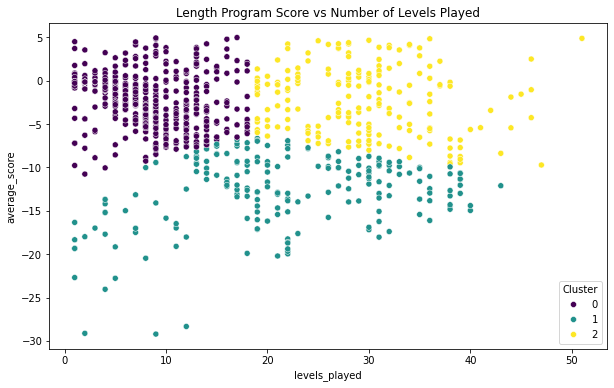

"\n# Application du clustering\nkmeans1 = KMeans(n_clusters=3)  \nplot_data_len_program_cluster['Cluster'] = kmeans1.fit_predict(scaled_features1)\n\nplt.figure(figsize=(10, 6))\nsns.scatterplot(data=plot_data_len_program_cluster, x='levels_played', y='average_score', hue='Cluster', palette='viridis')\n\nplt.show()"

In [42]:
#rajouter plot avec les classes

plot_data_len_program_cluster = plot_data_len_program[plot_data_len_program['average_score'] <5]
# Normalisation des caractéristiques
scaler = StandardScaler()
scaled_features = scaler.fit_transform(plot_data_len_program_cluster)



# Méthode du coude pour obtenir le nombre optimal de cluster

silhouette_scores = []
for i in range(2, 11):  # Commence à 2 car il n'y a pas de score de silhouette pour un seul cluster
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_scores.append(score)

# Trouver le nombre optimal de clusters basé sur le score de silhouette le plus élevé
optimal_n_clusters = np.argmax(silhouette_scores) + 2  # +2 car l'index commence à 0 et la boucle à 2 clusters
print(silhouette_scores)
# Appliquer KMeans avec le nombre optimal de clusters
kmeans_optimal = KMeans(n_clusters=optimal_n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans_optimal.fit(scaled_features)

# Ajouter les étiquettes de cluster aux données
plot_data_len_program_cluster['Cluster'] = kmeans_optimal.labels_

# Visualisation des clusters
plt.figure(figsize=(10, 6))
plt.title('Length Program Score vs Number of Levels Played')
sns.scatterplot(data=plot_data_len_program_cluster, x='levels_played', y='average_score', hue='Cluster', palette='viridis')
plt.show()
"""
# Application du clustering
kmeans1 = KMeans(n_clusters=3)  
plot_data_len_program_cluster['Cluster'] = kmeans1.fit_predict(scaled_features1)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=plot_data_len_program_cluster, x='levels_played', y='average_score', hue='Cluster', palette='viridis')

plt.show()"""

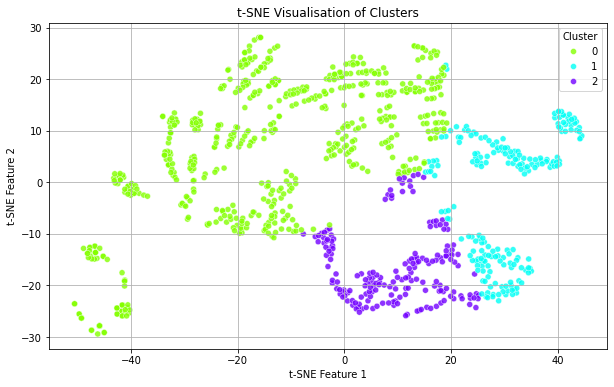

In [28]:
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(scaled_features)

# Ajout des résultats de t-SNE au DataFrame
plot_data_len_program_cluster['tsne-2d-one'] = tsne_results[:,0]
plot_data_len_program_cluster['tsne-2d-two'] = tsne_results[:,1]

# Visualisation des clusters avec t-SNE
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="Cluster",
    palette=sns.color_palette("hsv", 3),
    data=plot_data_len_program_cluster,
    legend="full",
    alpha=0.8
)

plt.title('t-SNE Visualisation of Clusters')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.grid(True)
plt.show()

In [29]:
launched_completed = data[(data["verb"]=="launched") |(data["verb"]=="completed")].reset_index()
launched_completed

,index,Unnamed: 0,actor,timestamp,stored,verb,levels,result,time
0,42,290069,f10c3152,2023-03-17T13:36:13.6560000Z,2023-03-17T13:49:15.073Z,launched,levels/collaborateur/niveau03,NaN,NaN
1,44,290080,f10c3152,2023-03-17T13:36:08.4130000Z,2023-03-17T13:49:15.073Z,completed,levels/collaborateur/niveau02,True,492.058
2,77,290586,f10c3152,2023-03-17T13:27:56.3550000Z,2023-03-17T13:36:10.267Z,launched,levels/collaborateur/niveau02,NaN,NaN
3,93,289244,f10c3090,2023-03-17T13:45:08.7270000Z,2023-03-17T13:48:18.969Z,launched,levels/tutoriel/createscript,NaN,NaN
4,95,289247,f10c3090,2023-03-17T13:45:06.6950000Z,2023-03-17T13:48:18.969Z,completed,levels/collaborateur/niveau07,True,362.299
...,...,...,...,...,...,...,...,...,...
42571,327381,201336,103D4EAB,2023-05-25T07:27:56.9460000Z,2023-05-25T07:24:38.490Z,launched,levels/explorateur/niveau02,NaN,NaN
42572,327383,201372,103D4EAB,2023-05-25T07:27:45.0580000Z,2023-05-25T07:24:12.421Z,completed,levels/explorateur/niveau01,True,29.895
42573,327388,201471,103D4EAB,2023-05-25T07:27:15.1630000Z,2023-05-25T07:24:12.394Z,launched,levels/explorateur/niveau01,NaN,NaN
42574,327390,201526,103D4EAB,2023-05-25T07:27:03.7550000Z,2023-05-25T07:23:31.167Z,completed,levels/tutoriel/tutoriel,True,84.453


In [30]:
clean_launched_completed = pd.DataFrame()

clean_id = []
clean_level = []
clean_time= []

for i in range(len(launched_completed)):

    
    

    if(launched_completed["verb"][i] == "completed"):
        playeridc = launched_completed["actor"][i]
        timec = launched_completed["timestamp"][i]

        for j in range(i,len(launched_completed)):

            playeridl = launched_completed["actor"][j]
            timel = launched_completed["timestamp"][j]

            if((launched_completed["verb"][j] == "launched") & (playeridc == playeridl) ):

                

                clean_id.append(playeridl)
                clean_level.append(launched_completed["levels"][j])
                clean_time.append(launched_completed["time"][i])
                break




clean_launched_completed["id"] = clean_id
clean_launched_completed["level"] = clean_level
clean_launched_completed["time"] = clean_time
clean_launched_completed

,id,level,time
0,f10c3152,levels/collaborateur/niveau02,492.058
1,f10c3090,levels/collaborateur/niveau07,362.299
2,f10c3090,levels/collaborateur/niveau07,195.543
3,f10c3090,levels/collaborateur/niveau06,132.224
4,f10c3090,levels/collaborateur/niveau06,56.500
...,...,...,...
18925,103D4EAB,levels/explorateur/niveau04,42.725
18926,103D4EAB,levels/explorateur/niveau03,27.930
18927,103D4EAB,levels/explorateur/niveau02,14.216
18928,103D4EAB,levels/explorateur/niveau01,29.895


In [31]:
# Calculating the mean completion time for each level

mean_completion_time_per_level = clean_launched_completed.groupby('level')['time'].mean()
mean_completion_time_per_level

level
levels/blocklymaze/niveau01      26.851355
levels/blocklymaze/niveau02      27.300717
levels/blocklymaze/niveau03      39.478320
levels/blocklymaze/niveau04      67.028032
levels/blocklymaze/niveau05      48.056258
                                   ...    
levels/tutoriel/createscript     54.539170
levels/tutoriel/nommerscript     66.529355
levels/tutoriel/ouvrirporte      54.059812
levels/tutoriel/tutoriel        104.561823
testfromleveled                 428.642000
Name: time, Length: 69, dtype: float64

In [32]:
clean_time_df =  clean_launched_completed.groupby(['id', 'level'])['time'].sum().reset_index()
clean_time_df

,id,level,time
0,103D4EAB,levels/collaborateur/niveau01,38.360
1,103D4EAB,levels/explorateur/niveau01,29.895
2,103D4EAB,levels/explorateur/niveau02,14.216
3,103D4EAB,levels/explorateur/niveau03,27.930
4,103D4EAB,levels/explorateur/niveau04,42.725
...,...,...,...
11649,c0f8ecf1,levels/tutoriel/nommerscript,266.349
11650,f10c3090,levels/collaborateur/niveau05,301.115
11651,f10c3090,levels/collaborateur/niveau06,380.650
11652,f10c3090,levels/collaborateur/niveau07,557.842


Rajouter temps total et temps moyen

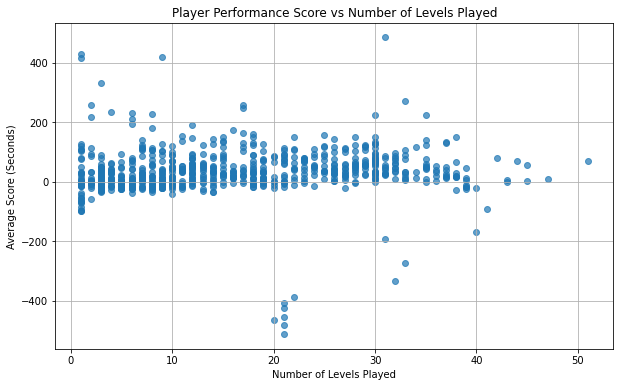

In [44]:
# Step 1: Calculating the difference between completion time and mean completion time for each level for each player

# Joining the mean completion time data with the original data

data_with_mean_time = clean_time_df.merge(mean_completion_time_per_level, on='level', suffixes=('', '_mean'))



# Calculating the absolute difference between the player's completion time and the mean completion time

data_with_mean_time['time'] = (data_with_mean_time['time'] - data_with_mean_time['time_mean'])



# Step 2: Calculating the mean score (average of the time differences) for each player

player_scores = data_with_mean_time.groupby('id')['time'].mean(numeric_only=False)



# Step 3: Preparing data for the plot

# Counting the number of levels played by each player

levels_played_per_player = clean_time_df.groupby('id')['level'].nunique()



# Merging the count of levels played with the scores for each player

plot_data_time = pd.DataFrame({

    'levels_played': levels_played_per_player,

    'average_score': player_scores

})


plot_data_time = plot_data_time[plot_data_time['average_score'] <1000]
# Step 4: Creating the plot

plt.figure(figsize=(10,6))

plt.scatter(plot_data_time['levels_played'], plot_data_time['average_score'], alpha=0.7)

plt.title('Player Performance Score vs Number of Levels Played')

plt.xlabel('Number of Levels Played')

plt.ylabel('Average Score (Seconds)')

plt.grid(True)

plt.show()

c:\Users\Lorenzo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Lorenzo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Lorenzo\AppData\Local\Temp\ipykernel_6484\311107862.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_data_time_cluster2['Clu

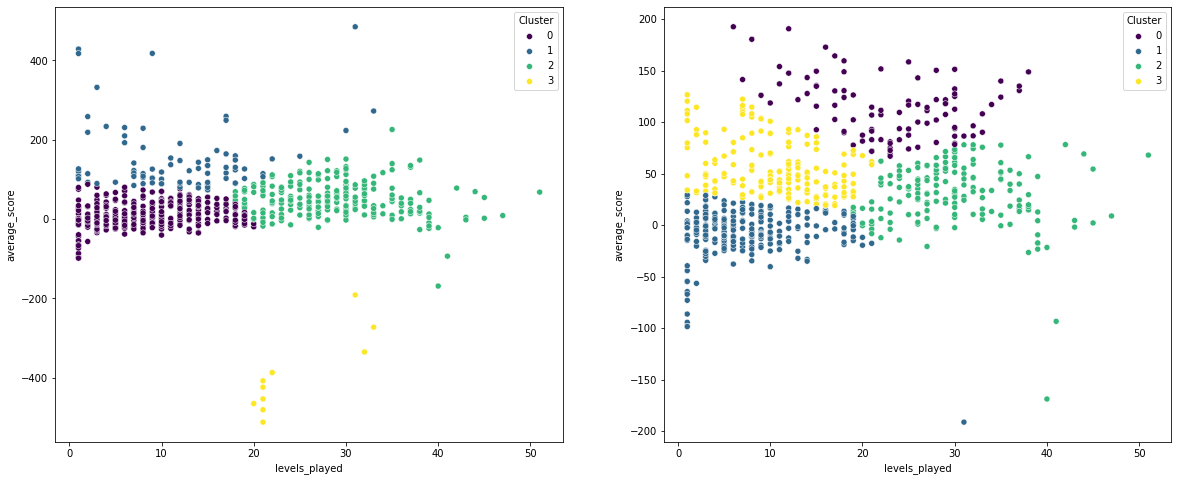

In [45]:
plot_data_time_cluster1 = plot_data_time[plot_data_time['average_score'] <1000]
plot_data_time_cluster2 = plot_data_time[(plot_data_time['average_score'] <200) & (plot_data_time['average_score'] >-200)]
# Normalisation des caractéristiques
scaler1 = StandardScaler()
scaled_features1 = scaler1.fit_transform(plot_data_time_cluster1)

scaler2 = StandardScaler()
scaled_features2 = scaler2.fit_transform(plot_data_time_cluster2)

# Application du clustering
kmeans1 = KMeans(n_clusters=4)  
plot_data_time_cluster1['Cluster'] = kmeans1.fit_predict(scaled_features1)

kmeans2 = KMeans(n_clusters=4)  
plot_data_time_cluster2['Cluster'] = kmeans2.fit_predict(scaled_features2)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
sns.scatterplot(data=plot_data_time_cluster1, x='levels_played', y='average_score', hue='Cluster', palette='viridis', ax = ax1)
sns.scatterplot(data=plot_data_time_cluster2, x='levels_played', y='average_score', hue='Cluster', palette='viridis',ax = ax2)

plt.show()

[0.5319030865521269, 0.49508244423359016, 0.502067220922386, 0.4737874762565204, 0.42960320284169573, 0.3807093229253783, 0.4061362434644744, 0.37058654864767504, 0.41901547117417665]


C:\Users\Lorenzo\AppData\Local\Temp\ipykernel_6484\3543615820.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_data_time_cluster2['Cluster'] = kmeans_optimal.labels_


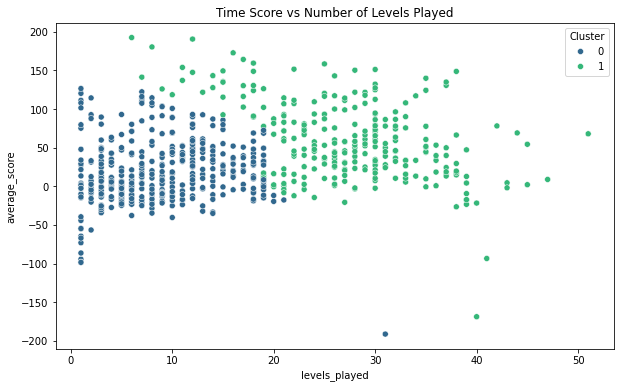

In [47]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(plot_data_time_cluster2)



# Méthode du coude pour obtenir le nombre optimal de cluster

silhouette_scores = []
for i in range(2, 11):  # Commence à 2 car il n'y a pas de score de silhouette pour un seul cluster
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_scores.append(score)

# Trouver le nombre optimal de clusters basé sur le score de silhouette le plus élevé
optimal_n_clusters = np.argmax(silhouette_scores) + 2  # +2 car l'index commence à 0 et la boucle à 2 clusters
print(silhouette_scores)
# Appliquer KMeans avec le nombre optimal de clusters
kmeans_optimal = KMeans(n_clusters=optimal_n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans_optimal.fit(scaled_features)

# Ajouter les étiquettes de cluster aux données
plot_data_time_cluster2['Cluster'] = kmeans_optimal.labels_

# Visualisation des clusters
plt.figure(figsize=(10, 6))
plt.title('Time Score vs Number of Levels Played')
sns.scatterplot(data=plot_data_time_cluster2, x='levels_played', y='average_score', hue='Cluster', palette='viridis')
plt.show()

C:\Users\Lorenzo\AppData\Local\Temp\ipykernel_6484\2532090322.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_data_time_cluster2['tsne-2d-one'] = tsne_results[:,0]
C:\Users\Lorenzo\AppData\Local\Temp\ipykernel_6484\2532090322.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_data_time_cluster2['tsne-2d-two'] = tsne_results[:,1]
C:\Users\Lorenzo\AppData\Local\Temp\ipykernel_6484\2532090322.py:10: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  s

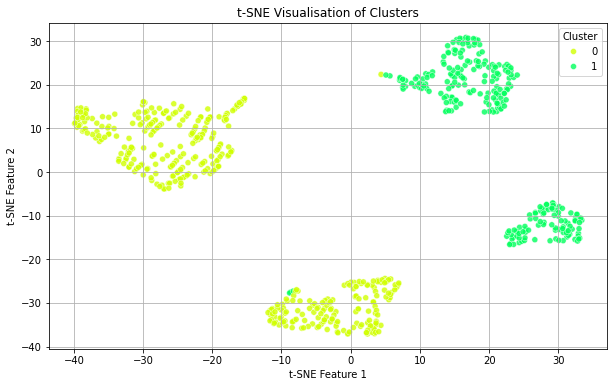

In [48]:
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(scaled_features)

# Ajout des résultats de t-SNE au DataFrame
plot_data_time_cluster2['tsne-2d-one'] = tsne_results[:,0]
plot_data_time_cluster2['tsne-2d-two'] = tsne_results[:,1]

# Visualisation des clusters avec t-SNE
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="Cluster",
    palette=sns.color_palette("hsv", 4),
    data=plot_data_time_cluster2,
    legend="full",
    alpha=0.8
)

plt.title('t-SNE Visualisation of Clusters')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.grid(True)
plt.show()

In [49]:
plot_data_time_cluster1[plot_data_time_cluster1["Cluster"] == 2]

,levels_played,average_score,Cluster
id,,,
119113B2,29,118.501346,2
133323C,32,74.261033,2
14A766E2,30,132.249340,2
15125659,35,44.051403,2
151257C6,21,92.910742,2
...,...,...,...
F435F24D,24,47.784005,2
F833ACFC,31,55.341932,2
FC5E2940,51,67.976892,2


[0.2975443745945252, 0.3019387875374482, 0.25632385636201876, 0.26051205443261644, 0.271484260424873, 0.2759031672813788, 0.26614864362164925, 0.2529863794410572, 0.2806856376383771]


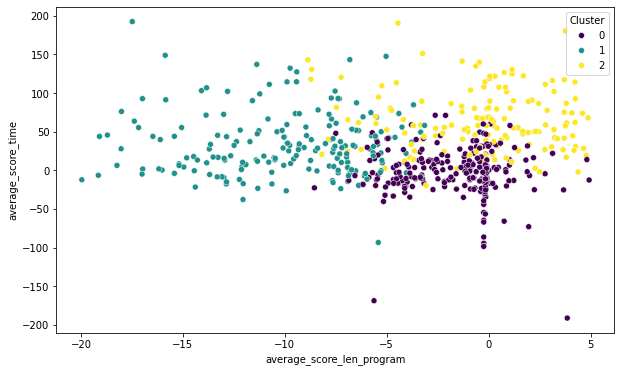

In [78]:


plot_data_time_execution = pd.DataFrame({

    'average_score_execution': plot_data_execution["average_score"],
    'average_score_len_program': plot_data_len_program["average_score"],
    'average_score_time': plot_data_time["average_score"]
    ,'levels_played': plot_data_execution["levels_played"]

}).dropna()

#plot_data_time_execution = plot_data_time_execution[abs(plot_data_time_execution["average_score_execution"])<2]
#plot_data_time_execution = plot_data_time_execution[abs(plot_data_time_execution["average_score_time"])<200]
#plot_data_time = plot_data_time[plot_data_time['average_score'] <1000]
# Step 4: Creating the plot
plot_data_time_execution = plot_data_time_execution[abs(plot_data_time_execution["average_score_execution"])<2]
plot_data_time_execution = plot_data_time_execution[abs(plot_data_time_execution["average_score_time"])<200]
plot_data_time_execution = plot_data_time_execution[plot_data_time_execution["average_score_len_program"]>-20]
# Normalisation des caractéristiques
scaler = StandardScaler()
scaled_features = scaler.fit_transform(plot_data_time_execution)

# Méthode du coude pour obtenir le nombre optimal de cluster

silhouette_scores = []
for i in range(2, 11):  # Commence à 2 car il n'y a pas de score de silhouette pour un seul cluster
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_scores.append(score)

# Trouver le nombre optimal de clusters basé sur le score de silhouette le plus élevé
optimal_n_clusters = np.argmax(silhouette_scores) + 2  # +2 car l'index commence à 0 et la boucle à 2 clusters
print(silhouette_scores)
# Appliquer KMeans avec le nombre optimal de clusters
kmeans_optimal = KMeans(n_clusters=optimal_n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans_optimal.fit(scaled_features)

# Ajouter les étiquettes de cluster aux données
plot_data_time_execution['Cluster'] = kmeans_optimal.labels_

# Visualisation des clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=plot_data_time_execution, x='average_score_len_program', y='average_score_time', hue='Cluster', palette='viridis')
plt.show()

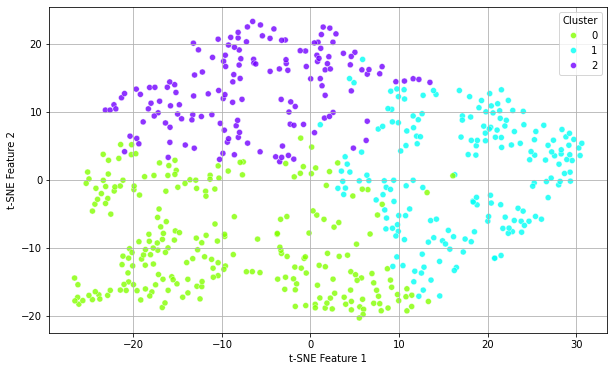

In [75]:
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(scaled_features)

# Ajout des résultats de t-SNE au DataFrame
plot_data_time_execution_tsne = pd.DataFrame()
plot_data_time_execution_tsne["Cluster"] = plot_data_time_execution["Cluster"]
plot_data_time_execution_tsne['tsne-2d-one'] = tsne_results[:,0]
plot_data_time_execution_tsne['tsne-2d-two'] = tsne_results[:,1]

# Visualisation des clusters avec t-SNE
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="Cluster",
    palette=sns.color_palette("hsv", 3),
    data=plot_data_time_execution_tsne,
    legend="full",
    alpha=0.8
)

plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.grid(True)
plt.show()

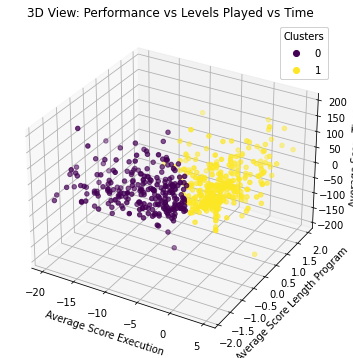

In [52]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Tracé des données
scatter = ax.scatter(plot_data_time_execution['average_score_len_program'],
                     plot_data_time_execution['average_score_execution'],
                     
                     plot_data_time_execution['average_score_time'],
                     c=plot_data_time_execution['Cluster'], cmap='viridis')

# Ajout de légendes et de titres
ax.set_title('3D View: Performance vs Levels Played vs Time')
ax.set_xlabel('Average Score Execution')
ax.set_ylabel('Average Score Length Program')
ax.set_zlabel('Average Score Time')

# Affichage de la légende
legend = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend)

plt.show()

c:\Users\Lorenzo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Text(0.5, 0, 'Average Score Time')

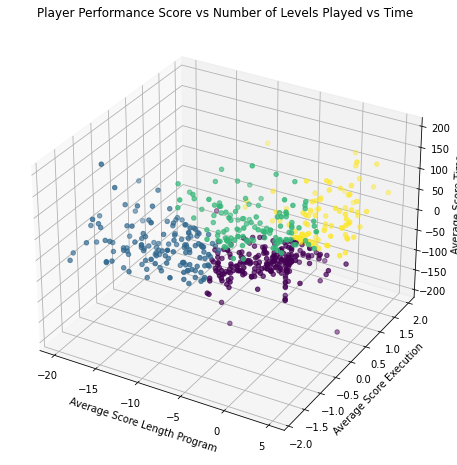

In [53]:


# Normalisation des caractéristiques


#scaler = StandardScaler()

#scaled_features = scaler.fit_transform(plot_data_time_execution)



# Application du clustering

kmeans = KMeans(n_clusters=4)  

plot_data_time_execution['Cluster'] = kmeans.fit_predict(scaled_features)



# Création du graphique 3D

fig = plt.figure(figsize=(10, 8))

ax = fig.add_subplot(111, projection='3d')



# Tracé des points avec coloration selon les clusters

scatter = ax.scatter(plot_data_time_execution['average_score_len_program'],

                     plot_data_time_execution['average_score_execution'],

                     plot_data_time_execution['average_score_time'],

                     c=plot_data_time_execution['Cluster'], cmap='viridis')



# Ajout de légendes et de titres

ax.set_title('Player Performance Score vs Number of Levels Played vs Time')

ax.set_xlabel('Average Score Length Program')

ax.set_ylabel('Average Score Execution')

ax.set_zlabel('Average Score Time')



# Affichage du graphique
#plt.show()

<span style="font-size:40px;">Clustering 3D</span>


In [56]:
len_program_df

,id,level,len_program
0,103D4EAB,levels/collaborateur/niveau01.xml,6
1,103D4EAB,levels/collaborateur/niveau02.xml,25
2,103D4EAB,levels/explorateur/niveau01.xml,1
3,103D4EAB,levels/explorateur/niveau02.xml,2
4,103D4EAB,levels/explorateur/niveau03.xml,3
...,...,...,...
18190,f10c3090,levels/collaborateur/niveau06.xml,90
18191,f10c3090,levels/collaborateur/niveau07.xml,47
18192,f10c3090,levels/tutoriel/createscript.xml,3
18193,f10c3152,levels/collaborateur/niveau02.xml,14


[0.4006746324474471, 0.355278823643954, 0.3163302331867734, 0.32392052339546545, 0.33054708150626994, 0.3164748982025087, 0.3103420023744937, 0.313743330064553, 0.2667079225169624]


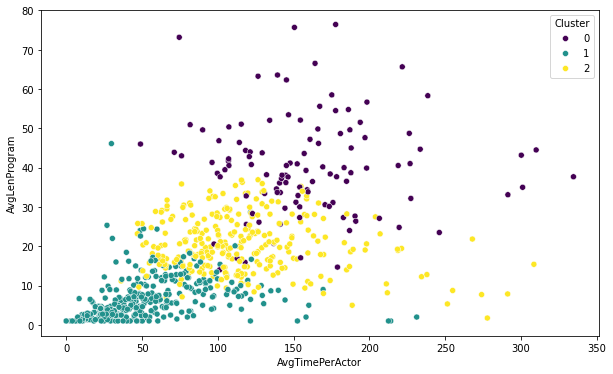

"\n# Application du clustering\nkmeans = KMeans(n_clusters=3)  \nclustering_df['Cluster'] = kmeans.fit_predict(scaled_features)\n# Visualisation des clusters\nplt.figure(figsize=(10, 6))\nsns.scatterplot(x='LevelsPlayed', y='AvgExecutionsPerLevel', hue='Cluster', data=clustering_df, palette='viridis')\nplt.title('Clustering Multidimensionnel des Joueurs')\nplt.xlabel('Nombre de Niveaux Joués')\nplt.ylabel('Moyenne des Exécutions par Niveau')\nplt.legend(title='Cluster')\nplt.show()"

In [62]:
levels_played_counts = data.groupby('actor')['levels'].nunique()

# Calcul de la moyenne des exécutions par niveau
total_executions_per_actor = data[data['verb'] == 'executed'].groupby('actor').size()
avg_executions_per_level = total_executions_per_actor / levels_played_counts

# Calcul du temps moyen par acteur
total_time_per_actor = data.groupby('actor')['time'].sum()
avg_time_per_actor = total_time_per_actor / levels_played_counts

total_len_program_per_actor = len_program_df.groupby('id')['len_program'].sum()
avg_len_program_per_actor = total_len_program_per_actor/len_program_df.groupby('id')['level'].nunique()


# Création du DataFrame pour le clustering
clustering_df = pd.DataFrame({
    'LevelsPlayed': levels_played_counts,
    'AvgExecutionsPerLevel': avg_executions_per_level,
    'AvgTimePerActor': avg_time_per_actor,
    'AvgLenProgram' : avg_len_program_per_actor
}).dropna()

# On enlève les quelques données aberrantes
clustering_df = clustering_df[clustering_df["AvgTimePerActor"]<400]
clustering_df = clustering_df[clustering_df["AvgExecutionsPerLevel"]<10]
# Normalisation des caractéristiques
scaler = StandardScaler()
scaled_features = scaler.fit_transform(clustering_df)

# Méthode du coude pour obtenir le nombre optimal de cluster

silhouette_scores = []
for i in range(2, 11):  # Commence à 2 car il n'y a pas de score de silhouette pour un seul cluster
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scaled_features)
    score = silhouette_score(scaled_features, kmeans.labels_)
    silhouette_scores.append(score)

# Trouver le nombre optimal de clusters basé sur le score de silhouette le plus élevé
optimal_n_clusters = np.argmax(silhouette_scores) + 2  # +2 car l'index commence à 0 et la boucle à 2 clusters
print(silhouette_scores)
# Appliquer KMeans avec le nombre optimal de clusters
kmeans_optimal = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans_optimal.fit(scaled_features)

# Ajouter les étiquettes de cluster aux données
clustering_df['Cluster'] = kmeans_optimal.labels_

# Visualisation des clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=clustering_df, x='AvgTimePerActor', y='AvgLenProgram', hue='Cluster', palette='viridis')
plt.show()

"""
# Application du clustering
kmeans = KMeans(n_clusters=3)  
clustering_df['Cluster'] = kmeans.fit_predict(scaled_features)
# Visualisation des clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='LevelsPlayed', y='AvgExecutionsPerLevel', hue='Cluster', data=clustering_df, palette='viridis')
plt.title('Clustering Multidimensionnel des Joueurs')
plt.xlabel('Nombre de Niveaux Joués')
plt.ylabel('Moyenne des Exécutions par Niveau')
plt.legend(title='Cluster')
plt.show()"""

C:\Users\Lorenzo\AppData\Local\Temp\ipykernel_6484\1187973251.py:10: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.scatterplot(


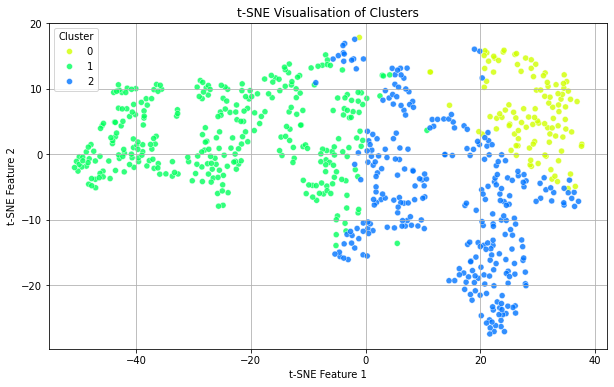

In [60]:
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(scaled_features)

# Ajout des résultats de t-SNE au DataFrame
clustering_df['tsne-2d-one'] = tsne_results[:,0]
clustering_df['tsne-2d-two'] = tsne_results[:,1]

# Visualisation des clusters avec t-SNE
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="Cluster",
    palette=sns.color_palette("hsv", 4),
    data=clustering_df,
    legend="full",
    alpha=0.8
)

plt.title('t-SNE Visualisation of Clusters')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.grid(True)
plt.show()

[0.33822948518344825, 0.4237169970912405, 0.2859309916684644, 0.2556496907196368, 0.24553200987719306, 0.2290740990319152, 0.21433589365464262, 0.21535957931791894, 0.21404020122114104]


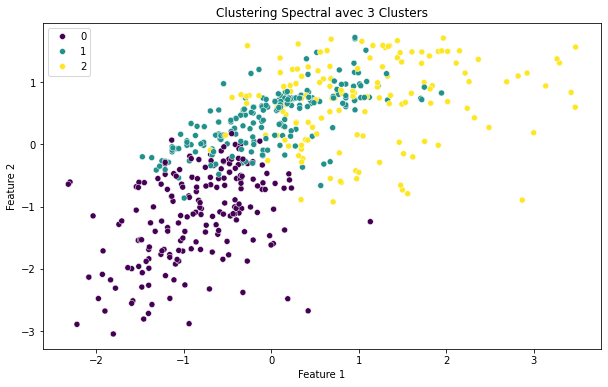

In [79]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(plot_data_time_execution)

silhouette_scores = []
for n_clusters in range(2, 11):
    spectral = SpectralClustering(n_clusters=n_clusters, affinity='nearest_neighbors', random_state=0)
    labels = spectral.fit_predict(scaled_features)
    score = silhouette_score(scaled_features, labels)
    silhouette_scores.append(score)

optimal_n_clusters = np.argmax(silhouette_scores) + 2  # +2 car l'index commence à 0 et la boucle à 2 clusters
print(silhouette_scores)
# Appliquer le clustering spectral avec le nombre optimal de clusters
spectral_optimal = SpectralClustering(n_clusters=optimal_n_clusters, affinity='nearest_neighbors', random_state=0)
labels_optimal = spectral_optimal.fit_predict(scaled_features)

# Visualisation des clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=scaled_features[:, 0], y=scaled_features[:, 1], hue=labels_optimal, palette='viridis')
plt.title(f'Clustering Spectral avec {optimal_n_clusters} Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

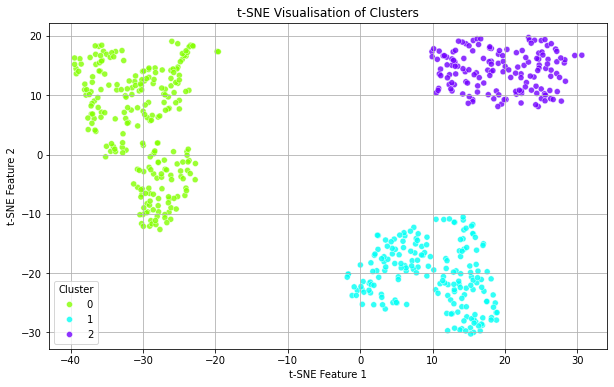

In [81]:
tsne = TSNE(n_components=2)
tsne_results = tsne.fit_transform(scaled_features)

# Ajout des résultats de t-SNE au DataFrame
plot_data_time_execution_tsne = pd.DataFrame()
plot_data_time_execution_tsne["Cluster"] = plot_data_time_execution["Cluster"]
plot_data_time_execution_tsne['tsne-2d-one'] = tsne_results[:,0]
plot_data_time_execution_tsne['tsne-2d-two'] = tsne_results[:,1]

# Visualisation des clusters avec t-SNE
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="Cluster",
    palette=sns.color_palette("hsv", 3),
    data=plot_data_time_execution_tsne,
    legend="full",
    alpha=0.8
)

plt.title('t-SNE Visualisation of Clusters')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.grid(True)
plt.show()

In [80]:
plot_data_time_execution

,average_score_execution,average_score_len_program,average_score_time,levels_played,Cluster
103D4EAB,-0.613220,-2.785555,3.812348,13.0,0
105CCD82,-1.076448,-4.670457,3.513067,7.0,0
109206A2,-1.698035,-15.186317,8.356039,4.0,1
12CF4D52,0.718472,-5.093331,2.464104,17.0,2
133323C,0.512010,4.083196,74.261033,32.0,2
...,...,...,...,...,...
FEA2C977,0.023680,1.150878,130.299673,17.0,2
FF78C228,-0.375301,-0.764110,-9.712017,4.0,0
FFD5A34E,1.930485,-0.923889,19.697803,5.0,2
MATHIEU,-1.304721,-12.049789,-37.834141,8.0,1


In [88]:
plot_data_time_execution_reset = plot_data_time_execution.reset_index()
plot_data_time_execution_reset = plot_data_time_execution_reset.rename(columns={'index': 'ID'})

In [89]:
plot_data_time_execution_reset

,ID,average_score_execution,average_score_len_program,average_score_time,levels_played,Cluster
0,103D4EAB,-0.613220,-2.785555,3.812348,13.0,0
1,105CCD82,-1.076448,-4.670457,3.513067,7.0,0
2,109206A2,-1.698035,-15.186317,8.356039,4.0,1
3,12CF4D52,0.718472,-5.093331,2.464104,17.0,2
4,133323C,0.512010,4.083196,74.261033,32.0,2
...,...,...,...,...,...,...
578,FEA2C977,0.023680,1.150878,130.299673,17.0,2
579,FF78C228,-0.375301,-0.764110,-9.712017,4.0,0
580,FFD5A34E,1.930485,-0.923889,19.697803,5.0,2
581,MATHIEU,-1.304721,-12.049789,-37.834141,8.0,1


In [91]:

merge3 = pd.merge(plot_data_time_execution_reset,clean_profiles, on = "ID")
merge3

,ID,average_score_execution,average_score_len_program,average_score_time,levels_played,Cluster,predicted_class
0,103D4EAB,-0.613220,-2.785555,3.812348,13.0,0,3ème
1,133323C,0.512010,4.083196,74.261033,32.0,2,5ème
2,1410D322,-1.195114,-6.197434,-18.222102,12.0,0,4ème
3,149C46A2,-1.302789,-16.018539,0.370729,19.0,1,4ème
4,14A766E2,-0.900471,-9.739131,132.249340,31.0,1,CM2
...,...,...,...,...,...,...,...
323,F981309C,-0.877364,-5.315242,-2.699188,18.0,1,5ème
324,F9B72966,0.806725,-3.797974,33.308807,11.0,2,6ème
325,FA7F8DCF,-0.157529,-4.181598,26.745412,9.0,0,4ème
326,FC5E2940,0.946183,4.879326,67.976892,51.0,2,5ème


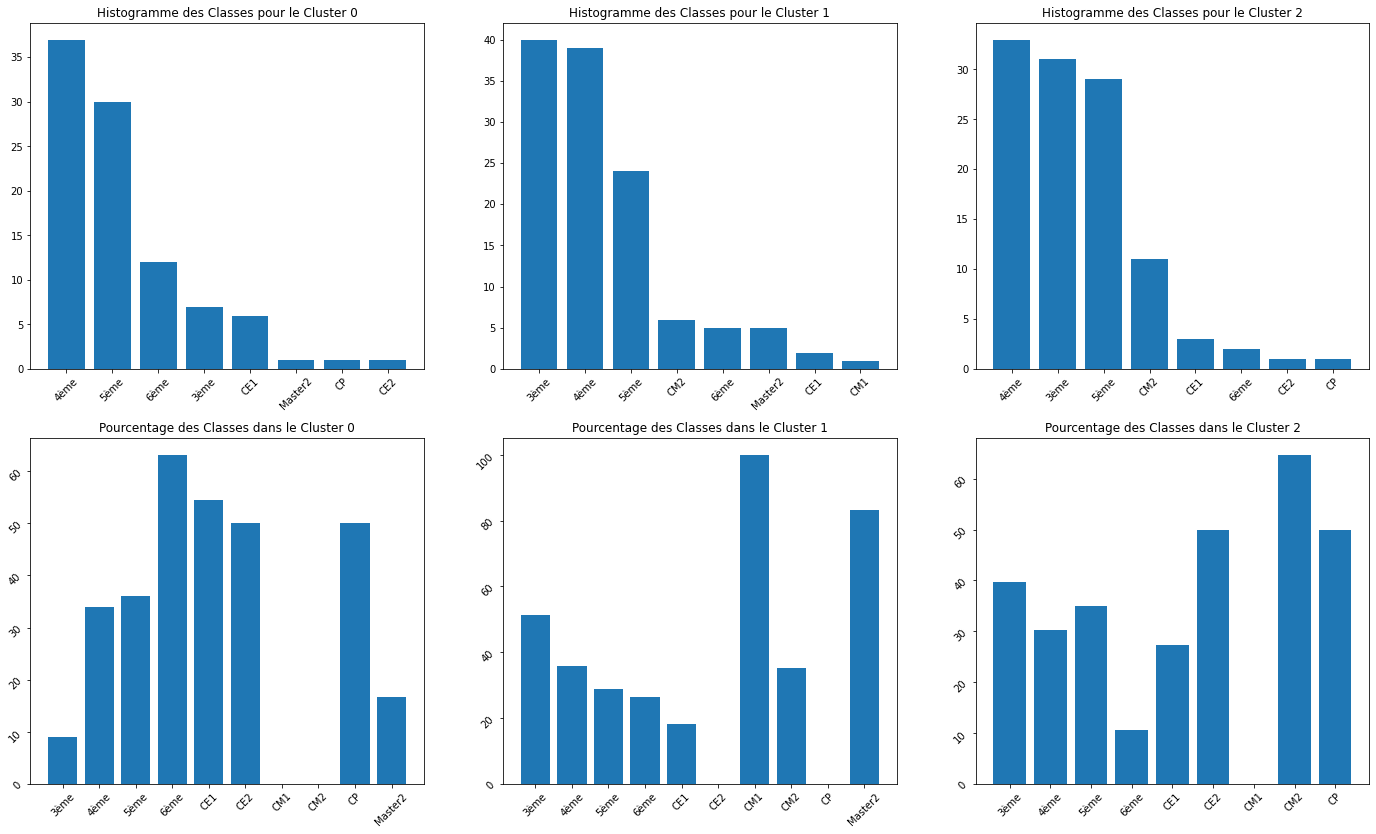

In [115]:
# Nombre de clusters uniques
num_clusters = merge3['Cluster'].nunique()
fig, axes = plt.subplots(2, 3, figsize=(24, 14))
# Créer un histogramme pour chaque cluster
for i in range(num_clusters):
    
    # Filtrer les données pour le cluster actuel
    cluster_data = merge3[merge3['Cluster'] == i]
    # Compter les occurrences de chaque classe dans le cluster
    class_counts = cluster_data['predicted_class'].value_counts()
    # Créer un histogramme
    axes[0][i].bar(class_counts.index, class_counts.values)
    axes[0][i].set_title(f'Histogramme des Classes pour le Cluster {i}')
    axes[0][i].tick_params(axis='x', rotation=45)

total_per_class = merge3['predicted_class'].value_counts()

# Nombre de clusters uniques
num_clusters = merge3['Cluster'].nunique()
#fig, axes = plt.subplots(1, 3, figsize=(20, 5))
# Créer un graphique pour chaque cluster
for i in range(num_clusters):
    
    # Filtrer les données pour le cluster actuel
    cluster_data = merge3[merge3['Cluster'] == i]
    # Compter les occurrences de chaque classe dans le cluster
    class_counts = cluster_data['predicted_class'].value_counts()
    # Calculer le pourcentage par rapport au total pour chaque classe
    class_percentages = (class_counts / total_per_class) * 100
    # Créer un histogramme
    axes[1][i].bar(class_percentages.index, class_percentages.values)
    axes[1][i].set_title(f'Pourcentage des Classes dans le Cluster {i}')
    axes[1][i].tick_params(rotation=45)  

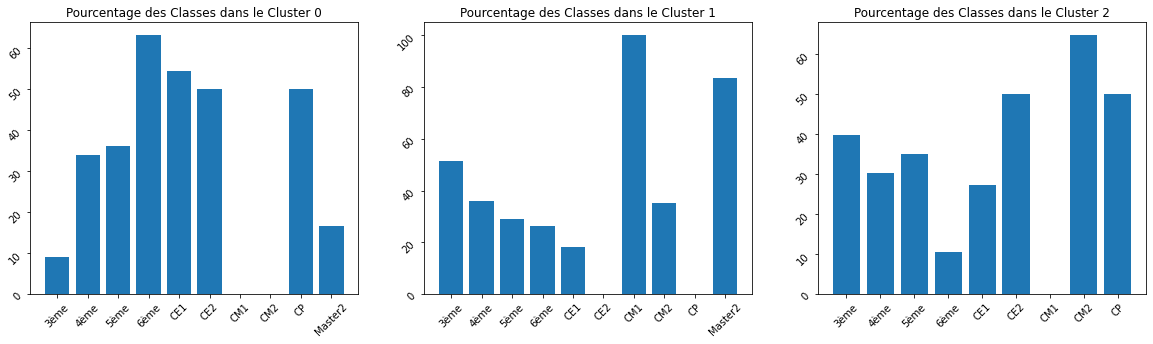

In [95]:
total_per_class = merge3['predicted_class'].value_counts()

# Nombre de clusters uniques
num_clusters = merge3['Cluster'].nunique()
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
# Créer un graphique pour chaque cluster
for i in range(num_clusters):
    
    # Filtrer les données pour le cluster actuel
    cluster_data = merge3[merge3['Cluster'] == i]
    # Compter les occurrences de chaque classe dans le cluster
    class_counts = cluster_data['predicted_class'].value_counts()
    # Calculer le pourcentage par rapport au total pour chaque classe
    class_percentages = (class_counts / total_per_class) * 100
    # Créer un histogramme
    axes[i].bar(class_percentages.index, class_percentages.values)
    axes[i].set_title(f'Pourcentage des Classes dans le Cluster {i}')
    axes[i].tick_params(rotation=45)  

In [97]:
plot_data_time_execution_reset

,ID,average_score_execution,average_score_len_program,average_score_time,levels_played,Cluster
0,103D4EAB,-0.613220,-2.785555,3.812348,13.0,0
1,105CCD82,-1.076448,-4.670457,3.513067,7.0,0
2,109206A2,-1.698035,-15.186317,8.356039,4.0,1
3,12CF4D52,0.718472,-5.093331,2.464104,17.0,2
4,133323C,0.512010,4.083196,74.261033,32.0,2
...,...,...,...,...,...,...
578,FEA2C977,0.023680,1.150878,130.299673,17.0,2
579,FF78C228,-0.375301,-0.764110,-9.712017,4.0,0
580,FFD5A34E,1.930485,-0.923889,19.697803,5.0,2
581,MATHIEU,-1.304721,-12.049789,-37.834141,8.0,1


C:\Users\Lorenzo\AppData\Local\Temp\ipykernel_6484\366535702.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cluster', y='average_score_time', data=plot_data_time_execution_reset, errorbar='sd', palette='deep')


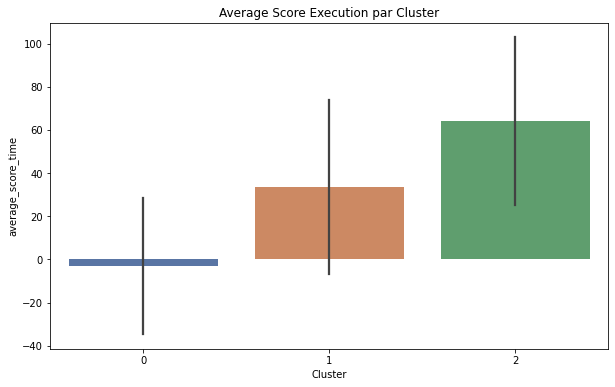

In [110]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
plt.figure(figsize=(10, 6))
sns.barplot(x='Cluster', y='average_score_time', data=plot_data_time_execution_reset, errorbar='sd', palette='deep')
plt.title('Average Score Execution par Cluster')
plt.show()

C:\Users\Lorenzo\AppData\Local\Temp\ipykernel_6484\2913960275.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cluster', y='average_score_execution', data=plot_data_time_execution_reset, errorbar='sd', palette='deep', ax=axes[0, 0])
C:\Users\Lorenzo\AppData\Local\Temp\ipykernel_6484\2913960275.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cluster', y='average_score_len_program', data=plot_data_time_execution_reset, errorbar='sd', palette='deep', ax=axes[0, 1])
C:\Users\Lorenzo\AppData\Local\Temp\ipykernel_6484\2913960275.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `le

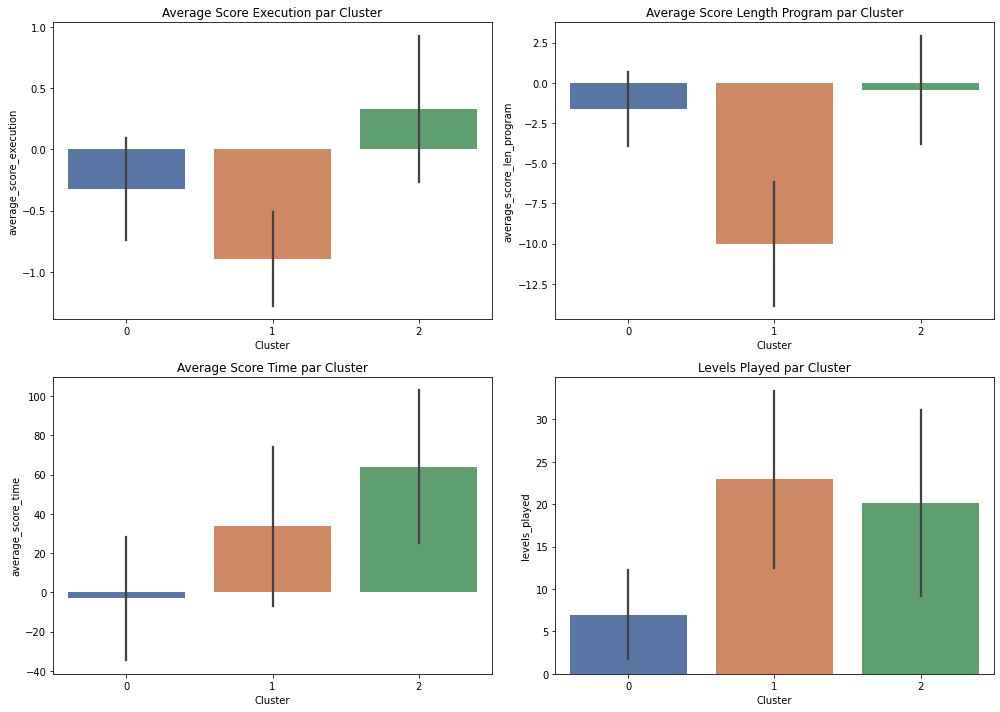

In [120]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Graphique pour 'average_score_execution'
sns.barplot(x='Cluster', y='average_score_execution', data=plot_data_time_execution_reset, errorbar='sd', palette='deep', ax=axes[0, 0])
axes[0, 0].set_title('Average Score Execution par Cluster')

# Graphique pour 'average_score_len_program'
sns.barplot(x='Cluster', y='average_score_len_program', data=plot_data_time_execution_reset, errorbar='sd', palette='deep', ax=axes[0, 1])
axes[0, 1].set_title('Average Score Length Program par Cluster')

# Graphique pour 'average_score_time'
sns.barplot(x='Cluster', y='average_score_time', data=plot_data_time_execution_reset, errorbar='sd', palette='deep', ax=axes[1, 0])
axes[1, 0].set_title('Average Score Time par Cluster')

# Graphique pour 'levels_played'
sns.barplot(x='Cluster', y='levels_played', data=plot_data_time_execution_reset, errorbar='sd', palette='deep', ax=axes[1, 1])
axes[1, 1].set_title('Levels Played par Cluster')

plt.tight_layout()
plt.show()
